<a href="https://colab.research.google.com/github/Njaramba-Riri/Object-detection/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"

In [ ]:
!nvidia-smi

Wed Apr 19 10:35:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow import keras

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d antoreepjana/animals-detection-images-dataset

100% 8.92G/8.92G [07:11<00:00, 24.5MB/s]
100% 8.92G/8.92G [07:11<00:00, 22.2MB/s]


In [ ]:
! unzip animals-detection-images-dataset.zip 

In [ ]:
train_ds=keras.utils.image_dataset_from_directory('/content/train',
                                                  validation_split=0.2,
                                                  subset="training",
                                                  seed=1200,
                                                  batch_size=64, 
                                                  image_size=(200,200))
val_ds=keras.utils.image_dataset_from_directory('/content/train',
                                                validation_split=0.2,
                                                subset='validation',
                                                seed=1200,
                                                batch_size=32,
                                                image_size=(200,200))
test=keras.utils.image_dataset_from_directory('/content/test', batch_size=64, image_size=(200,200))

Found 22566 files belonging to 80 classes.
Using 18053 files for training.
Found 22566 files belonging to 80 classes.
Using 4513 files for validation.
Found 6505 files belonging to 80 classes.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['Bear', 'Brown bear', 'Bull', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths and butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar bear', 'Rabbit', 'Raccoon', 'Raven', 'Red panda', 'Rhinoceros', 'Scorpion', 'Sea lion', 'Sea turtle', 'Seahorse', 'Shark', 'Sheep', 'Shrimp', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squid', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Turtle', 'Whale', 'Woodpecker', 'Worm', 'Zebra']


Visualizations

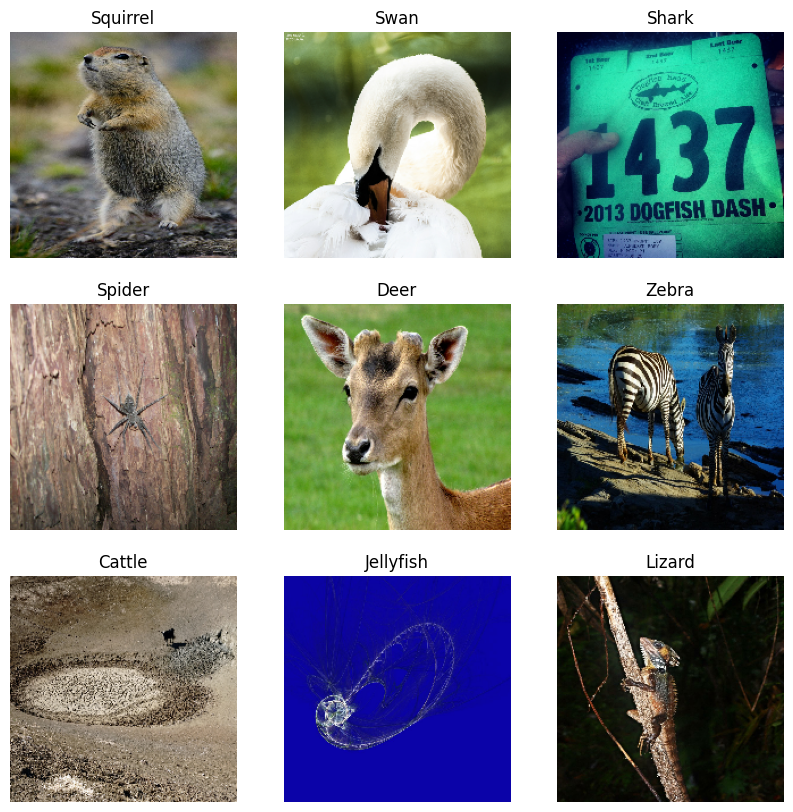

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(3):
  for i in range (9):
    ax=plt.subplot(330+i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

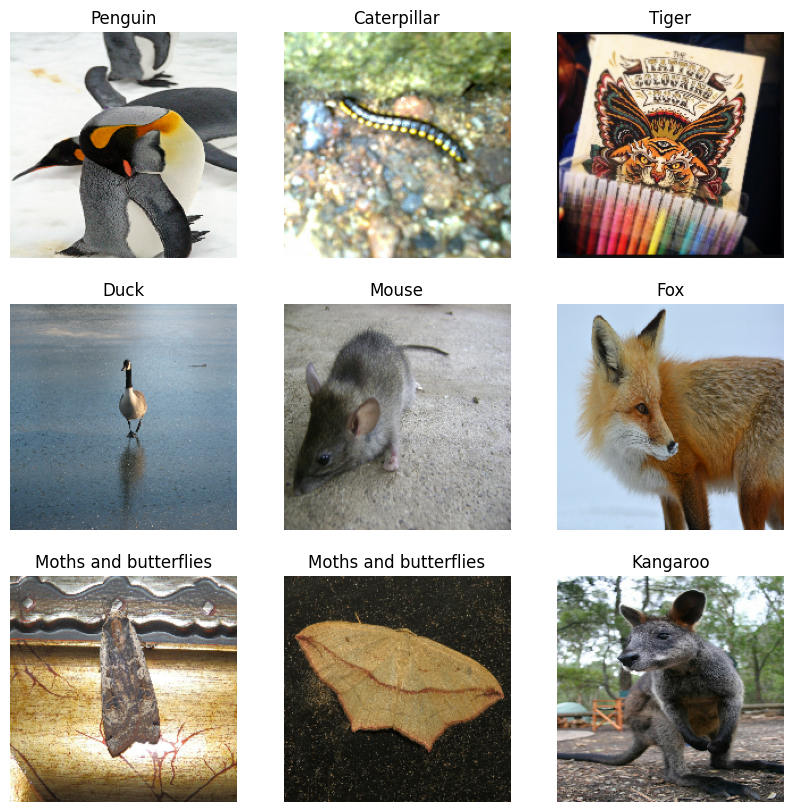

In [ ]:
plt.figure(figsize=(10,10))

for images,labels in val_ds.take(1):
  for i in range (9):
    plt.subplot(330+i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

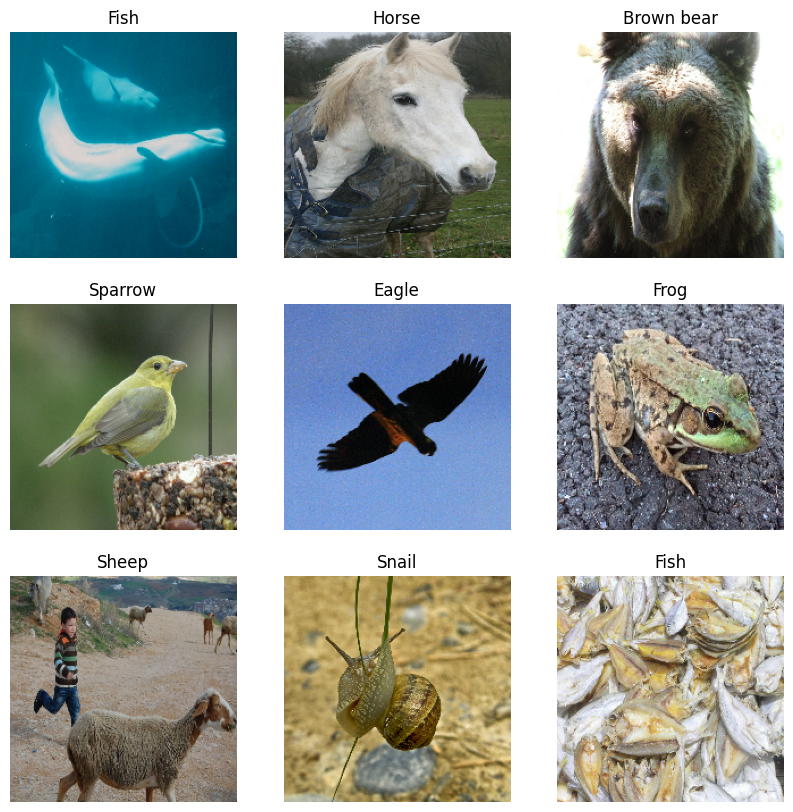

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in test.take(3):
  for i in range(9):
    ax=plt.subplot(330+i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [ ]:
data_augmentation=keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

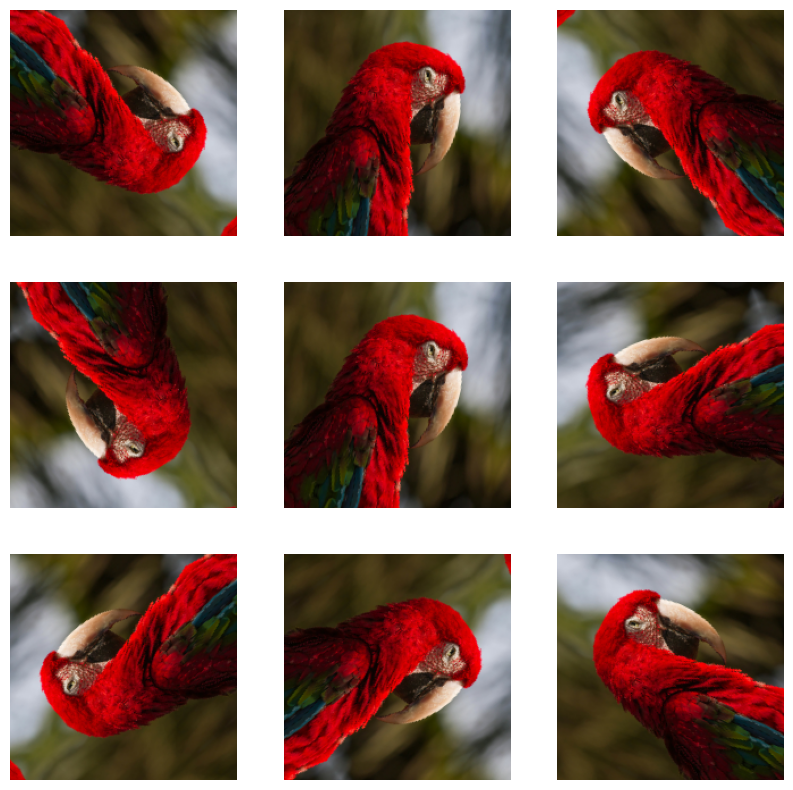

In [ ]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(50):
  for i in range(9):
    aug_image=data_augmentation(images)
    ax=plt.subplot(330+i+1)
    plt.xlabel(class_names[i])
    plt.imshow(aug_image[4].numpy().astype("uint8"))
    plt.axis("off")

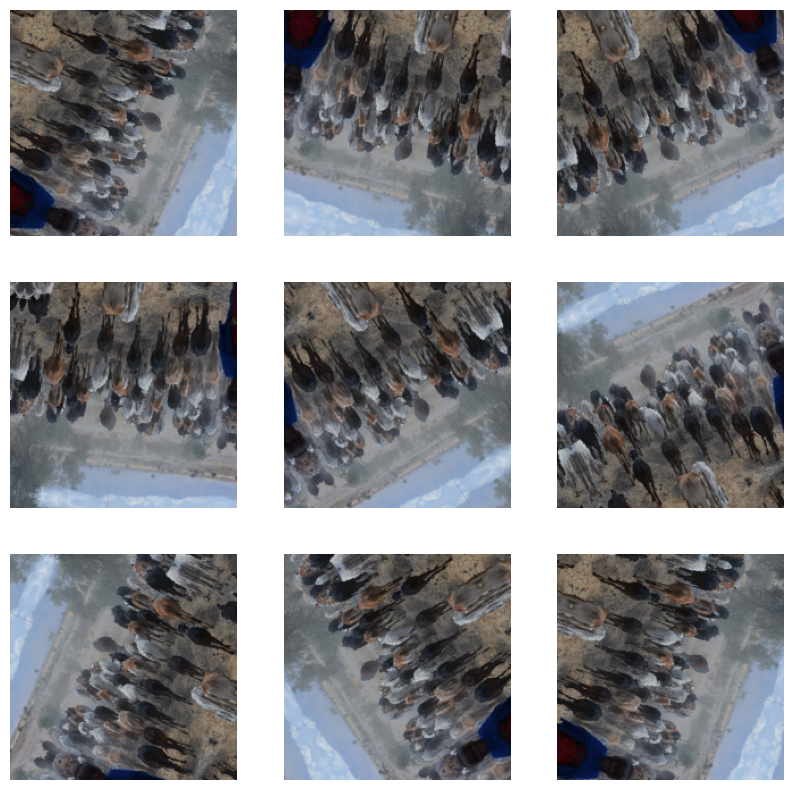

In [ ]:
plt.figure(figsize=(10,10))
for images,_ in test.take(1):
  for i in range(9):
    aug_image=data_augmentation(images)
    ax=plt.subplot(330+i+1)
    plt.imshow(aug_image[3].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 200, 200, 3)
(64,)


In [ ]:
num_classes=len(class_names)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1
                                   )
validation_gen = ImageDataGenerator(rescale=1./255)

### Model Defifinition

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#compile the model
epochs=25
lrate=0.01
decay=lrate/epochs
sgd=SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acuracy'])
model.summary()

NameError: ignored